In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# The code was removed by Watson Studio for sharing.

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
df=df_data_1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
Id                        568454 non-null int64
ProductId                 568454 non-null object
UserId                    568454 non-null object
ProfileName               568438 non-null object
HelpfulnessNumerator      568454 non-null int64
HelpfulnessDenominator    568454 non-null int64
Score                     568454 non-null int64
Time                      568454 non-null int64
Summary                   568427 non-null object
Text                      568454 non-null object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [4]:
df.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [5]:
# Looking at the summary of the reviews.
df.Summary.head(5)


0    Good Quality Dog Food
1        Not as Advertised
2    "Delight" says it all
3           Cough Medicine
4              Great taffy
Name: Summary, dtype: object

In [6]:
# Looking at the description of the reviews
df.Text.head(5)

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

Text preprocessing

In [7]:
# Import libraries
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

In [8]:
# Lower casing and removing punctuations
df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Text'] = df['Text'].str.replace('[^\w\s]','"')
df.Text.head(5)

0    i have bought several of the vitality canned d...
1    product arrived labeled as jumbo salted peanut...
2    this is a confection that has been around a fe...
3    if you are looking for the secret ingredient i...
4    great taffy at a great price" there was a wide...
Name: Text, dtype: object

In [9]:
# Removal of stop words
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.Text.head(5)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/dsxuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanuts""...
2    confection around centuries" light" pillowy ci...
3    looking secret ingredient robitussin believe f...
4    great taffy great price" wide assortment yummy...
Name: Text, dtype: object

In [10]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/dsxuser/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
# Lemmatization

df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.Text.head(5)

0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanuts""...
2    confection around centuries" light" pillowy ci...
3    looking secret ingredient robitussin believe f...
4    great taffy great price" wide assortment yummy...
Name: Text, dtype: object

xploratory data analysis
This step is not connected anywhere in predicting sentiments; what we are trying to do here is to dig deeper into the data and understand it.

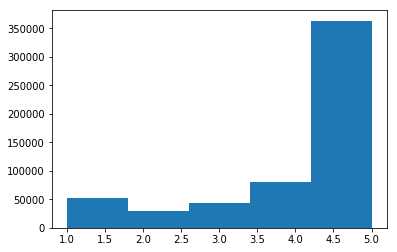

Score
1     52264
2     29743
3     42638
4     80655
5    363111
Name: Id, dtype: int64


In [12]:
# Create a new data frame "reviews" to perform exploratory data analysis upon that
reviews = df
# Dropping null values
reviews.dropna(inplace=True)
# The histogram reveals this dataset is highly unbalanced towards high rating.
reviews.Score.hist(bins=5,grid=False)
plt.show()
print(reviews.groupby('Score').count().Id)

In [13]:
# To make it balanced data, we sampled each score by the lowest n-count from above. (i.e. 29743 reviews scored as '2')
score_1 = reviews[reviews['Score'] == 1].sample(n=29743)
score_2 = reviews[reviews['Score'] == 2].sample(n=29743)
score_3 = reviews[reviews['Score'] == 3].sample(n=29743)
score_4 = reviews[reviews['Score'] == 4].sample(n=29743)
score_5 = reviews[reviews['Score'] == 5].sample(n=29743)
# Here we recreate a 'balanced' dataset.
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)

Here our target variable would be positive, negative, and neutral created using score.
Score <= 2: Negative

Score = 3: Neutral

Score > =4: Positive

In [14]:
# Printing count by 'Score' to check dataset is now balanced.
print(reviews_sample.groupby('Score').count().Id)

Score
1    29743
2    29743
3    29743
4    29743
5    29743
Name: Id, dtype: int64


In [15]:
!conda install -c conda-forge wordcloud

Solving environment: done

# All requested packages already installed.



In [16]:
# Let's build a word cloud looking at the 'Summary'  text
from wordcloud import WordCloud
from wordcloud import STOPWORDS

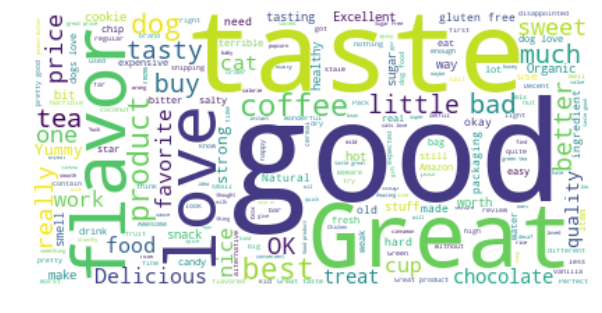

In [17]:
# Wordcloud function's input needs to be a single string of text.
# Here I'm concatenating all Summaries into a single string.
# similarly you can build for Text column
reviews_str = reviews_sample.Summary.str.cat()
wordcloud = WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

Text(0.5,1,'Reviews with Negative Scores')

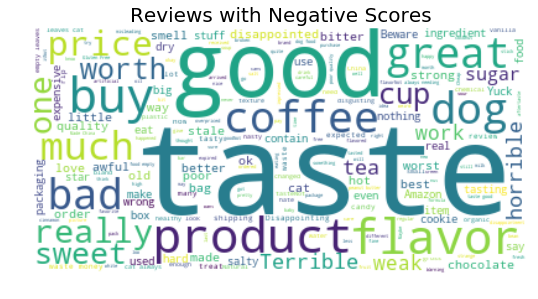

In [18]:
# Now let's split the data into Negative (Score is 1 or 2) and Positive (4 or #5) Reviews.
negative_reviews = reviews_sample[reviews_sample['Score'].isin([1,2]) ]
positive_reviews = reviews_sample[reviews_sample['Score'].isin([4,5]) ]
# Transform to single string
negative_reviews_str = negative_reviews.Summary.str.cat()
positive_reviews_str = positive_reviews.Summary.str.cat()
# Create wordclouds
wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='white').generate(positive_reviews_str)
# Plot
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Scores',fontsize=20)

In [19]:
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Scores',fontsize=20)
plt.show()

Feature engineering
This step is not required as we are not building the model from scratch; rather we are using the pretrained model from the library vaderSentiment.

If you want to build the model from scratch, you can leverage the above positive and negative classes created while exploring as a target variable and then training the model.

Sentiment scores
Sentiment Analysis: Pretrained model takes the input from the text description and outputs the sentiment score ranging from -1 to +1 for each sentence.

In [20]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import os
import sys
import ast
plt.style.use('fivethirtyeight')

In [21]:
!pip install vaderSentiment

tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.


In [22]:
# Function for getting the sentiment
cp = sns.color_palette()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [23]:
# Generating sentiment for all the sentence present in the dataset
emptyline=[]
for row in df['Text']:
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)

In [24]:
# Creating new dataframe with sentiments    
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head(5)

,compound,neg,neu,pos
0,0.9413,0.000,0.517,0.483
1,-0.1027,0.129,0.762,0.110
2,0.8624,0.127,0.591,0.281
3,0.4404,0.000,0.868,0.132
4,0.9468,0.000,0.369,0.631


In [25]:
# Merging the sentiments back to reviews dataframe
df_c = pd.concat([df.reset_index(drop=True), df_sentiments], axis=1)
df_c.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,compound,neg,neu,pos
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.9413,0.000,0.517,0.483
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"product arrived labeled jumbo salted peanuts""""...",-0.1027,0.129,0.762,0.110
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","confection around centuries"" light"" pillowy ci...",0.8624,0.127,0.591,0.281


In [26]:
df_c.dtypes

Id                          int64
ProductId                  object
UserId                     object
ProfileName                object
HelpfulnessNumerator        int64
HelpfulnessDenominator      int64
Score                       int64
Time                        int64
Summary                    object
Text                       object
compound                  float64
neg                       float64
neu                       float64
pos                       float64
dtype: object

In [27]:
# Convert scores into positive and negetive sentiments using some threshold
df_c['Sentiment'] = np.where(df_c['compound'] >= 0 , 'Positive', 'Negative')
df_c.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,compound,neg,neu,pos,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.9413,0.000,0.517,0.483,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"product arrived labeled jumbo salted peanuts""""...",-0.1027,0.129,0.762,0.110,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","confection around centuries"" light"" pillowy ci...",0.8624,0.127,0.591,0.281,Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,looking secret ingredient robitussin believe f...,0.4404,0.000,0.868,0.132,Positive
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,"great taffy great price"" wide assortment yummy...",0.9468,0.000,0.369,0.631,Positive


Business insights
Let’s see how the overall sentiment is using the sentiment we generated.

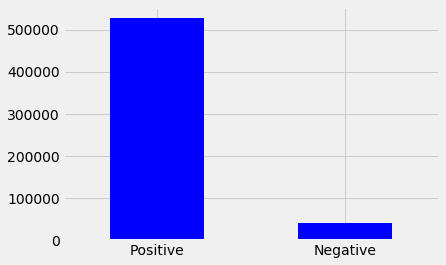

In [28]:
result=df_c['Sentiment'].value_counts()
result.plot(kind='bar', rot=0,color='b');

In [ ]:
#Sample code snippet
result=df_c.groupby('ProductId')['Sentiment'].value_counts().unstack()
result[['Negative','Positive']].plot(kind='bar', rot=0,color='rb')